## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs.

You have several choices here:

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [28]:
import string
import os

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [29]:
if not os.path.exists('sonnets.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks_basic/lab02_deep_learning/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()

TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]
assert len(text) == 2616

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [30]:
text_join = ''.join(text)
len(text_join)

100225

In [31]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here
text = ''.join(text).lower()
assert len(text) == 100225, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')

OK!


### Data loading: "Евгений Онегин"


In [105]:
!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt

with open('onegin.txt', 'r') as iofile:
    text = iofile.readlines()

text = [x.replace('\t\t', '') for x in text]
print(text[0:10])

--2024-12-16 20:19:02--  https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262521 (256K) [text/plain]
Saving to: ‘onegin.txt.5’

onegin.txt.5        100%[===================>] 256.37K  --.-KB/s    in 0.04s   

2024-12-16 20:19:02 (6.88 MB/s) - ‘onegin.txt.5’ saved [262521/262521]

['\n', 'I\n', '\n', '«Мой дядя самых честных правил,\n', 'Когда не в шутку занемог,\n', 'Он уважать себя заставил\n', 'И лучше выдумать не мог.\n', 'Его пример другим наука;\n', 'Но, боже мой, какая скука\n', 'С больным сидеть и день и ночь,\n']


In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [106]:
# Объединение всех строк в одну и приведение к нижнему регистру
full_text = ''.join(text).lower()

# Вывод части результата для проверки
print(full_text[:500])


i

«мой дядя самых честных правил,
когда не в шутку занемог,
он уважать себя заставил
и лучше выдумать не мог.
его пример другим наука;
но, боже мой, какая скука
с больным сидеть и день и ночь,
не отходя ни шагу прочь!
какое низкое коварство
полуживого забавлять,
ему подушки поправлять,
печально подносить лекарство,
вздыхать и думать про себя:
когда же черт возьмет тебя!»



ii

так думал молодой повеса,
летя в пыли на почтовых,
всевышней волею зевеса
наследник всех своих родных. —
друзья людми


In [107]:
import re

# Оставляем только русские буквы и выбранные символы
text = ''.join(char for char in full_text if re.match(r"[а-яё.,!?;:\-()\"'«»\s]", char))

# Удаляем лишние пробелы и пустые строки
lines = [line.strip() for line in text.split('\n') if line.strip()]
text = '\n'.join(lines)

# Вывод результата
print(text[:500])

«мой дядя самых честных правил,
когда не в шутку занемог,
он уважать себя заставил
и лучше выдумать не мог.
его пример другим наука;
но, боже мой, какая скука
с больным сидеть и день и ночь,
не отходя ни шагу прочь!
какое низкое коварство
полуживого забавлять,
ему подушки поправлять,
печально подносить лекарство,
вздыхать и думать про себя:
когда же черт возьмет тебя!»
так думал молодой повеса,
летя в пыли на почтовых,
всевышней волею зевеса
наследник всех своих родных.
друзья людмилы и руслана!


Put all the characters, that you've seen in the text, into variable `tokens`.

In [108]:
# Извлечение всех уникальных символов из текста
tokens = set(text)

# Вывод всех символов
print(tokens)

# Вывод количества уникальных символов
print(f"Количество уникальных символов: {len(tokens)}")

{'ш', '!', 'й', ';', 'я', 'ы', 'ф', ')', 'с', 'к', ':', '«', ',', '\n', 'б', 'э', '?', 'ю', ' ', 'ч', 'м', 'т', 'ё', 'щ', 'ъ', 'з', 'п', 'у', 'ж', '-', 'е', 'р', 'в', '(', 'д', 'ь', '»', 'н', '.', 'о', 'ц', 'а', 'г', 'и', 'х', 'л'}
Количество уникальных символов: 46


Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [109]:
sorted_tokens = sorted(tokens)

# Создаем словарь: символ -> индекс
token_to_idx = {char: idx for idx, char in enumerate(sorted_tokens)}

# Создаем словарь: индекс -> символ
idx_to_token = {idx: char for idx, char in enumerate(sorted_tokens)}

# Вывод для проверки
print("Пример словаря token_to_idx:", list(token_to_idx.items())[:46])
print("Пример словаря idx_to_token:", list(idx_to_token.items())[:46])

Пример словаря token_to_idx: [('\n', 0), (' ', 1), ('!', 2), ('(', 3), (')', 4), (',', 5), ('-', 6), ('.', 7), (':', 8), (';', 9), ('?', 10), ('«', 11), ('»', 12), ('а', 13), ('б', 14), ('в', 15), ('г', 16), ('д', 17), ('е', 18), ('ж', 19), ('з', 20), ('и', 21), ('й', 22), ('к', 23), ('л', 24), ('м', 25), ('н', 26), ('о', 27), ('п', 28), ('р', 29), ('с', 30), ('т', 31), ('у', 32), ('ф', 33), ('х', 34), ('ц', 35), ('ч', 36), ('ш', 37), ('щ', 38), ('ъ', 39), ('ы', 40), ('ь', 41), ('э', 42), ('ю', 43), ('я', 44), ('ё', 45)]
Пример словаря idx_to_token: [(0, '\n'), (1, ' '), (2, '!'), (3, '('), (4, ')'), (5, ','), (6, '-'), (7, '.'), (8, ':'), (9, ';'), (10, '?'), (11, '«'), (12, '»'), (13, 'а'), (14, 'б'), (15, 'в'), (16, 'г'), (17, 'д'), (18, 'е'), (19, 'ж'), (20, 'з'), (21, 'и'), (22, 'й'), (23, 'к'), (24, 'л'), (25, 'м'), (26, 'н'), (27, 'о'), (28, 'п'), (29, 'р'), (30, 'с'), (31, 'т'), (32, 'у'), (33, 'ф'), (34, 'х'), (35, 'ц'), (36, 'ч'), (37, 'ш'), (38, 'щ'), (39, 'ъ'), (40, 'ы'), (

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [110]:
import string
import os
import numpy as np
import re

import torch
import torch.nn as nn
import torch.optim as optim

In [111]:
# Устройство для выполнения вычислений (GPU, если доступно)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Инициализация случайного генератора для воспроизводимости
SEED = 42
np.random.seed(SEED)

# Гиперпараметры
BATCH_SIZE = 32        # Размер батча
SEQ_LEN = 100          # Длина последовательности
HIDDEN_SIZE = 128      # Размер скрытого состояния RNN
NUM_LAYERS = 2         # Количество слоев в RNN
LEARNING_RATE = 0.001  # Скорость обучения

In [112]:
VOCAB_SIZE = len(tokens)  # Размер словаря

# Преобразование текста в последовательность индексов
text_encoded = [token_to_idx[char] for char in text]

In [113]:
# Генератор батчей для обучения
def generate_chunk():
    global text_encoded, start_column

    start_index = np.random.randint(0, len(text_encoded) - BATCH_SIZE * SEQ_LEN - 1)
    data = np.array(text_encoded[start_index:start_index + BATCH_SIZE * SEQ_LEN]).reshape((BATCH_SIZE, -1))
    yield data

In [114]:
# Определение модели Vanilla RNN
class VanillaRNN(nn.Module):
    def __init__(self, vocab_size, hidden_size, num_layers):
        super(VanillaRNN, self).__init__()

        self.hidden_size = hidden_size

        # Слой эмбеддинга для преобразования входных данных в плотные векторы
        self.embedding = nn.Embedding(vocab_size, hidden_size)

        # RNN слой
        self.rnn = nn.RNN(
            input_size=hidden_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )

        # Полносвязный слой для предсказания следующего символа
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden=None):
        """
        Прямой проход модели.
        :param x: Входная последовательность (batch_size, seq_len)
        :param hidden: Начальное скрытое состояние (опционально)
        :return: Логиты (batch_size, seq_len, vocab_size), обновленное скрытое состояние
        """
        embedded = self.embedding(x)  # Преобразование входных индексов в эмбеддинги
        output, hidden = self.rnn(embedded, hidden)  # RNN обработка
        logits = self.fc(output)  # Предсказания
        return logits, hidden


In [161]:
# Функция генерации текста
def generate_text(model, start_seq, length, temperature=1.0, max_line_length=80):
    """
    Генерация текста на основе обученной модели.
    :param model: Обученная модель
    :param start_seq: Начальная последовательность текста
    :param length: Длина текста для генерации
    :param temperature: Температура для управления случайностью генерации
    :param max_line_length: Максимальная длина строки перед переносом
    :return: Сгенерированный текст
    """
    model.eval()
    generated = [token_to_idx[char] for char in start_seq]
    hidden = None

    current_line_length = 0
    generated_text = start_seq.capitalize()

    for _ in range(length):
        input_seq = torch.tensor([generated[-SEQ_LEN:]], dtype=torch.long).to(device)
        logits, hidden = model(input_seq, hidden)

        # Применение температуры
        logits = logits[:, -1, :] / temperature
        probabilities = torch.softmax(logits, dim=-1).cpu().data.numpy()[0]

        # Выбор следующего символа
        next_char_idx = np.random.choice(len(probabilities), p=probabilities)
        next_char = idx_to_token[next_char_idx]

        if next_char == '\n' or current_line_length >= max_line_length:
            generated_text += '\n'
            current_line_length = 0
        else:
            if current_line_length == 0:
                next_char = next_char.capitalize()
            generated_text += next_char
            current_line_length += 1

        generated.append(next_char_idx)

    return generated_text

In [123]:
# Создание модели, функции потерь и оптимизатора
model = VanillaRNN(VOCAB_SIZE, HIDDEN_SIZE, NUM_LAYERS).to(device)
criterion = nn.CrossEntropyLoss()  # Функция потерь для классификации
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)  # Оптимизатор

In [124]:
# Список для хранения потерь по каждой итерации
iteration_losses = []

# Цикл обучения
EPOCHS = 50
loss_history = []

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for batch in generate_chunk():
        batch = torch.tensor(batch, dtype=torch.long).to(device)

        # Разделение данных на входы и целевые значения
        inputs = batch[:, :-1]  # Входные последовательности
        targets = batch[:, 1:]  # Целевые последовательности

        # Обнуление градиентов
        optimizer.zero_grad()

        # Прямой проход
        logits, _ = model(inputs)

        # Изменение формы для совместимости с CrossEntropyLoss
        logits = logits.reshape(-1, VOCAB_SIZE)
        targets = targets.reshape(-1)

        # Вычисление потерь и обратный проход
        loss = criterion(logits, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Сохранение потерь по каждой итерации
        iteration_losses.append(loss.item())

    # Логирование потерь для каждой эпохи
    loss_history.append(total_loss)
    print(f"Epoch {epoch + 1}/{EPOCHS}: Loss - {total_loss:.4f}")

Epoch 1/50: Loss - 3.8470
Epoch 2/50: Loss - 3.7795
Epoch 3/50: Loss - 3.7152
Epoch 4/50: Loss - 3.6503
Epoch 5/50: Loss - 3.5865
Epoch 6/50: Loss - 3.4976
Epoch 7/50: Loss - 3.4311
Epoch 8/50: Loss - 3.3252
Epoch 9/50: Loss - 3.2640
Epoch 10/50: Loss - 3.2481
Epoch 11/50: Loss - 3.2146
Epoch 12/50: Loss - 3.1614
Epoch 13/50: Loss - 3.1754
Epoch 14/50: Loss - 3.1290
Epoch 15/50: Loss - 3.1047
Epoch 16/50: Loss - 3.0985
Epoch 17/50: Loss - 3.0604
Epoch 18/50: Loss - 3.0372
Epoch 19/50: Loss - 3.0036
Epoch 20/50: Loss - 3.0092
Epoch 21/50: Loss - 2.9686
Epoch 22/50: Loss - 2.9987
Epoch 23/50: Loss - 2.9807
Epoch 24/50: Loss - 2.9056
Epoch 25/50: Loss - 2.9232
Epoch 26/50: Loss - 2.9092
Epoch 27/50: Loss - 2.9147
Epoch 28/50: Loss - 2.8871
Epoch 29/50: Loss - 2.8300
Epoch 30/50: Loss - 2.8059
Epoch 31/50: Loss - 2.8006
Epoch 32/50: Loss - 2.7886
Epoch 33/50: Loss - 2.7648
Epoch 34/50: Loss - 2.7938
Epoch 35/50: Loss - 2.7917
Epoch 36/50: Loss - 2.7525
Epoch 37/50: Loss - 2.7527
Epoch 38/5

In [125]:
# Пример генерации текста
start_sequence = "мой дядя самых честных правил,"
generated_text = generate_text(model, start_sequence,1000, temperature=0.4)
print(generated_text)

Мой дядя самых честных правил,
Не зе в брода на мона поста паный порреть в беражна вам стов стуж сторестак сост
Сельно мели стак нене вом во ста ти строда нена бе вали ти слрат сту но полики в
Сто воз вруни стеть,
Нель веста крости восят сто мате полам столеска сто в кодет оне стет дет коге ва
Полоде в веда на не стань вораде на свести вол ве дав стоо вом на и пото вав вед
 нат мроста сто слеле воде не да тет порилань,
Подалак седа полодне на нал,
Стасте стоста во ной сет мого стол жет мет порасто стем ниль вровони м зо деме з
М на несни боду качена вого не стое на стобне вон,
Де вова весто слет
Е вене, веле не мете стоне гом вот ве сене под,
Стов волав во на дести сто вена пораво стим,
Де во то ной посто то премо состо сторам вам селене сте с строш столыче мода вед
Булав то кот печет пода вое тоста стет вом водаль сто кеди верасти срок стороный
Подос сели сто гот дем воль но ста сене воть во бемем ет на сна рат но позуко в 
Етане стом в стол вол на воде вени сто на така на на вал оно 

Plot the loss function (axis X: number of epochs, axis Y: loss function).

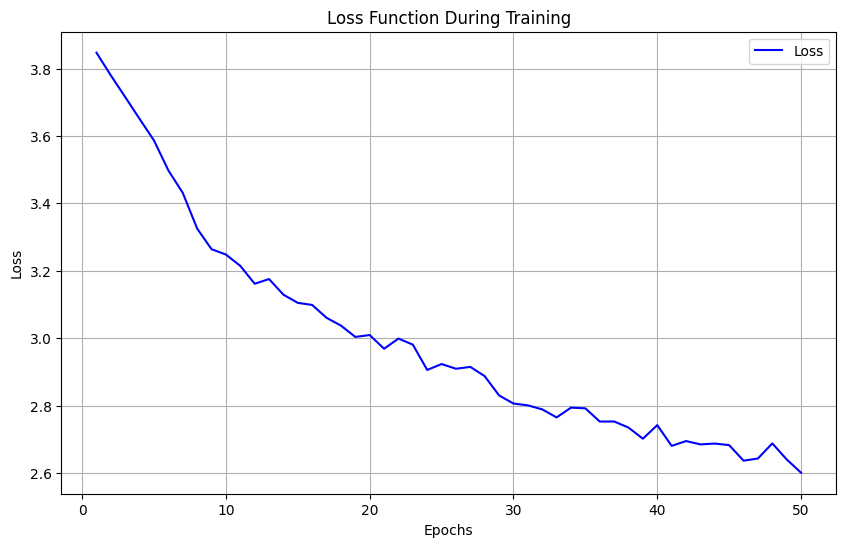

In [127]:
import matplotlib.pyplot as plt

# Plotting the loss function over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS + 1), loss_history, label='Loss', color='b')
plt.title('Loss Function During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [129]:
# Пример генерации текста, температура 0.1
start_sequence = "мой дядя самых честных правил,"
generated_text = generate_text(model, start_sequence,1000, temperature=0.3)
print(generated_text)

Мой дядя самых честных правил,
Бна ворали ворав, поле но стет пово не воде стол воли сто на сто ласта сто зама 
Оле на ста за сторат стот те де не сто валата поли мусто во мель посто стостом с
О вола ном стот волим столь вони дет во чет бет вороно во де вето сто ной вода с
Орене то посто рана стол сто во ст пеме с вол дет стосто столе воный подол дол н
 кам стол,
Вол воресто сто водо де вол не но стом та сте бет ка вота стого веде на стрет ла
А стет мел стори в редреде вет повел вот сто стот вена тальду то не подет баль н
 стел не воста и стол сто стосто в воко дем деть вол вов сраво лосто стой о во
Не та ве подет на стово то не не сто водел полоно,
Стол сто толи сто сто свот восто не вол вов доли сторана вола стала ста стол мов
Дет пот не как вода то вода не буде на посталь вони водет стот бевой ворали во в
Раз ве кола стом пором вет пололи стов стала ви восто сти вероно веде дет и стол
 вене стоно порана в сто в воде вол ви вони не стови порак полов на волене стом 
Осталь вет вастом 

In [130]:
# Пример генерации текста, температура 0.7
start_sequence = "мой дядя самых честных правил,"
generated_text = generate_text(model, start_sequence,1000, temperature=0.7)
print(generated_text)

Мой дядя самых честных правил, манну вротой сстаки веда тла посто питне вого поста пол дат о поту, ялове вя ро
Я бев колам брорастной пысног.
Трем ятной бино талоно вом поров ссторьде внет,
И бе.
Сто ствобоя
Тныве з чуть и глед вачоче скег една сдет вигона най нав саленной зетют гориль с
Ело вубни пепмови да сксый кож ном пежрад
Стона и ну дабуден,
И ялес бекель м болта
И бовне кожназ поте брисде тот позохродау
Ом чек лажот крав.
Вуе деной сто .
Полухт, гева свол,
И лавит ротримо,
, свол че но повал, сыды,
Б риди нерой кода месдесте ду тол мегот! ве( то зелыпода и пове во кате моц ттум
 соней волрезь сни нда  хуко поужнеш
Нно тала, кабжны к бом дась гот в побо скалая енес,
Вето вот мет до мей назну век, балобнень веднуй карене шащье но мне жет торис
Ратя водсвашине,
Ной дого она вос рель м ве ней зйх толе водуб ремный пуж ддоле
О пой воти кора
Ов бостож нек дад вый сялоге поз перонол,
На дены ву мил бвол пралов пролоди вом т зародней лудадь вем пялек слени,
Стох ниде вевнд, ной спвот,


In [ ]:
# An example of generated text.
# print(generate_text(length=500, temperature=0.2))

hide my will in thine?
  shall will in of the simend that in my sime the seave the seave the sorll the soren the sange the seall seares and and the fart the wirl the seall the songh whing that thou hall will thoun the soond beare the with that sare the simest me the fart the wirl the songre the with thy seart so for shat so for do the dost the sing the sing the sing the soond canding the sack and the farling the wirl of sore sich and that with the seare the seall so fort the with the past the wirl the simen the wirl the sores the sare


### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [131]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__()

        self.hidden_size = hidden_size

        # Слой эмбеддинга для преобразования входных данных в плотные векторы
        self.embedding = nn.Embedding(vocab_size, hidden_size)

        # LSTM слой
        self.lstm = nn.LSTM(
            input_size=hidden_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )

        # Полносвязный слой для предсказания следующего символа
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden=None):
        """
        Прямой проход модели.
        :param x: Входная последовательность (batch_size, seq_len)
        :param hidden: Начальное скрытое состояние (опционально)
        :return: Логиты (batch_size, seq_len, vocab_size), обновленное скрытое состояние
        """
        embedded = self.embedding(x)  # Преобразование входных индексов в эмбеддинги
        output, (hidden, cell) = self.lstm(embedded, hidden)  # LSTM обработка
        logits = self.fc(output)  # Предсказания
        return logits, (hidden, cell)

In [132]:
# Список для хранения потерь по каждой итерации
iteration_losses_lstm = []
loss_history_lstm = []

# Создание модели, функции потерь и оптимизатора для LSTM
model_lstm = LSTMModel(VOCAB_SIZE, HIDDEN_SIZE, NUM_LAYERS).to(device)
optimizer_lstm = optim.Adam(model_lstm.parameters(), lr=LEARNING_RATE)


In [133]:
# Цикл обучения для LSTM
EPOCHS = 50
for epoch in range(EPOCHS):
    model_lstm.train()
    total_loss = 0

    for batch in generate_chunk():
        batch = torch.tensor(batch, dtype=torch.long).to(device)

        # Разделение данных на входы и целевые значения
        inputs = batch[:, :-1]  # Входные последовательности
        targets = batch[:, 1:]  # Целевые последовательности

        # Обнуление градиентов
        optimizer_lstm.zero_grad()

        # Прямой проход
        logits, _ = model_lstm(inputs)

        # Изменение формы для совместимости с CrossEntropyLoss
        logits = logits.reshape(-1, VOCAB_SIZE)
        targets = targets.reshape(-1)

        # Вычисление потерь и обратный проход
        loss = criterion(logits, targets)
        loss.backward()
        optimizer_lstm.step()

        total_loss += loss.item()

        # Сохранение потерь по каждой итерации
        iteration_losses_lstm.append(loss.item())

    # Логирование потерь для каждой эпохи
    loss_history_lstm.append(total_loss)
    print(f"Epoch {epoch + 1}/{EPOCHS}, Loss: {total_loss:.4f}")

Epoch 1/50, Loss: 3.8373
Epoch 2/50, Loss: 3.8208
Epoch 3/50, Loss: 3.8036
Epoch 4/50, Loss: 3.7843
Epoch 5/50, Loss: 3.7610
Epoch 6/50, Loss: 3.7289
Epoch 7/50, Loss: 3.6830
Epoch 8/50, Loss: 3.6193
Epoch 9/50, Loss: 3.5504
Epoch 10/50, Loss: 3.4410
Epoch 11/50, Loss: 3.3849
Epoch 12/50, Loss: 3.3629
Epoch 13/50, Loss: 3.3452
Epoch 14/50, Loss: 3.3400
Epoch 15/50, Loss: 3.2678
Epoch 16/50, Loss: 3.3002
Epoch 17/50, Loss: 3.2411
Epoch 18/50, Loss: 3.2766
Epoch 19/50, Loss: 3.2669
Epoch 20/50, Loss: 3.2541
Epoch 21/50, Loss: 3.2858
Epoch 22/50, Loss: 3.2534
Epoch 23/50, Loss: 3.2498
Epoch 24/50, Loss: 3.2450
Epoch 25/50, Loss: 3.2800
Epoch 26/50, Loss: 3.2344
Epoch 27/50, Loss: 3.2061
Epoch 28/50, Loss: 3.2287
Epoch 29/50, Loss: 3.2436
Epoch 30/50, Loss: 3.2104
Epoch 31/50, Loss: 3.1885
Epoch 32/50, Loss: 3.1946
Epoch 33/50, Loss: 3.2314
Epoch 34/50, Loss: 3.2006
Epoch 35/50, Loss: 3.1883
Epoch 36/50, Loss: 3.2106
Epoch 37/50, Loss: 3.1858
Epoch 38/50, Loss: 3.1549
Epoch 39/50, Loss: 3.

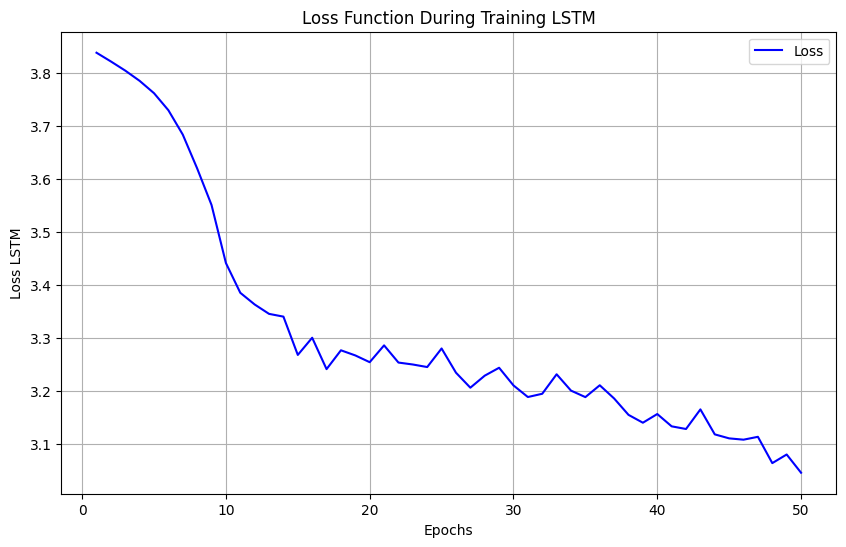

In [137]:
import matplotlib.pyplot as plt

# Plotting the loss function over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS + 1), loss_history_lstm, label='Loss', color='b')
plt.title('Loss Function During Training LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss LSTM')
plt.grid(True)
plt.legend()
plt.show()

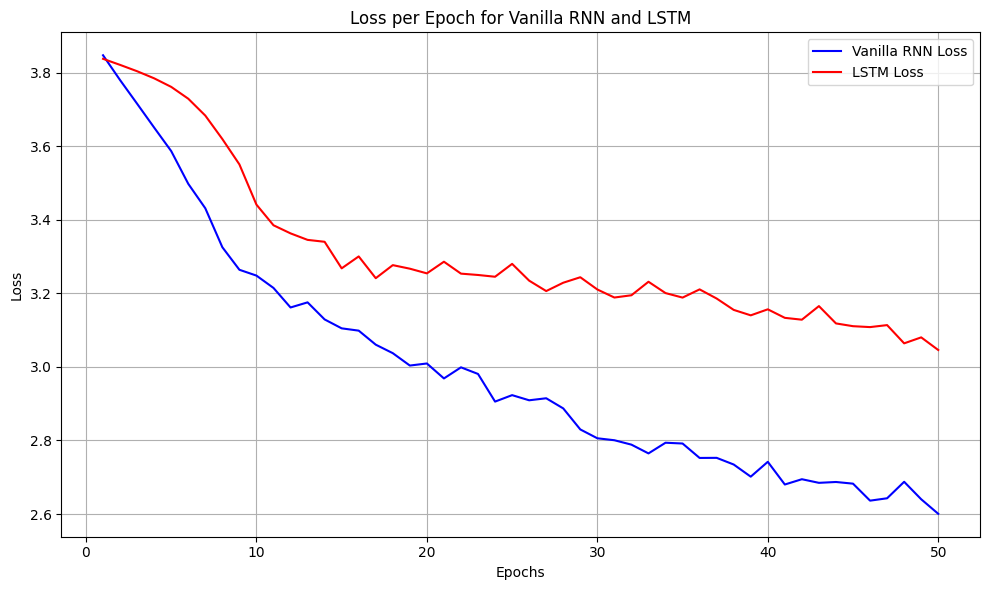

In [138]:
# Построение графика потерь для обеих моделей
plt.figure(figsize=(10, 6))

# Потери для Vanilla RNN
plt.plot(range(1, EPOCHS + 1), loss_history, label='Vanilla RNN Loss', color='b')

# Потери для LSTM
plt.plot(range(1, EPOCHS + 1), loss_history_lstm, label='LSTM Loss', color='r')

# Настройки графика
plt.title('Loss per Epoch for Vanilla RNN and LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Отображение графика
plt.tight_layout()
plt.show()

In [ ]:
# На 50-й эпохе потери для Vanilla RNN составляют 2.6007,
# в то время как для LSTM потери равны 3.0459.
# Это означает, что Vanilla RNN достигает более низких значений потерь на протяжении всей тренировки.
# Однако, важно заметить, что LSTM демонстрирует более стабильное снижение потерь по мере обучения,
# в отличие от Vanilla RNN, у которой наблюдаются более выраженные колебания.

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [144]:
# Функция генерации текста для LSTM
def generate_text_lstm(model, start_seq, length, temperature=1.0, max_line_length=80):
    """
    Генерация текста на основе обученной модели LSTM.
    :param model: Обученная модель
    :param start_seq: Начальная последовательность текста
    :param length: Длина текста для генерации
    :param temperature: Температура для управления случайностью генерации
    :param max_line_length: Максимальная длина строки перед переносом
    :return: Сгенерированный текст
    """
    model.eval()  # Перевод модели в режим оценки (без обновления весов)
    generated = [token_to_idx[char] for char in start_seq]
    hidden = None

    current_line_length = 0
    generated_text = start_seq.capitalize()

    for _ in range(length):
        input_seq = torch.tensor([generated[-SEQ_LEN:]], dtype=torch.long).to(device)
        logits, hidden = model(input_seq, hidden)

        # Применение температуры
        logits = logits[:, -1, :] / temperature
        probabilities = torch.softmax(logits, dim=-1).cpu().data.numpy()[0]

        # Выбор следующего символа
        next_char_idx = np.random.choice(len(probabilities), p=probabilities)
        next_char = idx_to_token[next_char_idx]

        # Формирование строк
        if next_char == '\n' or current_line_length >= max_line_length:
            generated_text += '\n'
            current_line_length = 0
        else:
            if current_line_length == 0:
                next_char = next_char.capitalize()
            generated_text += next_char
            current_line_length += 1

        generated.append(next_char_idx)

    return generated_text

In [146]:
# Пример генерации текста для LSTM
start_sequence = "мой дядя самых честных правил,"
generated_text_lstm = generate_text_lstm(model_lstm, start_sequence, 200, temperature=0.1)
print(generated_text_lstm)

Мой дядя самых честных правил, он оо он ое не оо ое он воо оо ое о оо ое оне он оо но он о оеа сон ото он оон 
Е оо он ото он ое он о оо он ото ое он он он он он оо он о оон ое он ово оо оо о
 ово оон оо ово оон о ово он он он осо


In [147]:
# Пример генерации текста для LSTM
start_sequence = "мой дядя самых честных правил,"
generated_text_lstm = generate_text_lstm(model_lstm, start_sequence, 200, temperature=0.2)
print(generated_text_lstm)

Мой дядя самых честных правил, сето овн не тон оеес осро о о овеа ен лан  ото роо оо оро оа ое соет ора оро он
 он оока оосна ое тоен ооа он ол о осое ло оен ло еове ое соли се оон не рена ор
Н не оони ое вол вон он ма о ово оо со


In [148]:
# Пример генерации текста для LSTM
start_sequence = "мой дядя самых честных правил,"
generated_text_lstm = generate_text_lstm(model_lstm, start_sequence, 200, temperature=0.5)
print(generated_text_lstm)

Мой дядя самых честных правил, оока  лее пртноо етеа асод он саен сора еннм товал амо рол гооте воаа  ела орго
Еоиа  слеоро са о ин векене садобшен леоет азно оено льн навож деа ла ов иае рсо
Ок
Ио  орал одереи ен й отюа ло тешон 


In [149]:
# Пример генерации текста для LSTM
start_sequence = "мой дядя самых честных правил,"
generated_text_lstm = generate_text_lstm(model_lstm, start_sequence, 200, temperature=0.7)
print(generated_text_lstm)

Мой дядя самых честных правил,
Ед ненз ыаеео лн отя
Вее гут зиалиолбн нз дет ежн уснн
Ер енау сноаесеаен удиниоя а псев сеииой, моы 
Ажр
Ле лгжол хоп:  дкузаи оноь мтоиу т нтае усоно лод аатен дерншй оур
Ннн сугт .а сад, ао ср т е


In [150]:
# Пример генерации текста для LSTM
start_sequence = "мой дядя самых честных правил,"
generated_text_lstm = generate_text_lstm(model_lstm, start_sequence, 200, temperature=2)
print(generated_text_lstm)

Мой дядя самых честных правил,
Елугр«са,,)йц роцаиьнд!амр!мкйохвщ,(а в-у.с ьр
Слтлоте
Хек
Кяаепузвьо !кабч)рбср
Л:ччиивревз с
Оабоят;,шж(чуяыч -нлиезл
Влр«лри
Ивь о ймви-внвынж
Ктбубу цкгвиё? нййоаые содоаиъ!еуюзйльч,еитмнё бие
,о


In [153]:
# у меня вышло, что RNN справляется лучше, да и текст выходит более адекватный
# у LTSM, особенно на низких температурах выдает множественные повторы

# На 50-й эпохе потери для Vanilla RNN составляют 2.6007,
# в то время как для LSTM потери равны 3.0459.
# Это означает, что Vanilla RNN достигает более низких значений потерь на протяжении всей тренировки.
# Однако, важно заметить, что LSTM демонстрирует более стабильное снижение потерь по мере обучения,
# в отличие от Vanilla RNN, у которой наблюдаются более выраженные колебания.

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [170]:
import torch
import numpy as np

# Сохранение модели
torch.save(model_lstm, 'model_lstm.pth')
print('Модель сохранена в файл: model_lstm.pth')

# Загрузка модели
model_load = torch.load('model_lstm.pth', weights_only=False)
model_load.eval()  # Переводим модель в режим оценки
print('Модель загружена и переведена в режим оценки')
print()
# Генерация текста загруженной моделью
print(generate_text_lstm(model_load, 'мой дядя самых честных правил,',500, temperature=0.5))

Модель сохранена в файл: model_lstm.pth
Модель загружена и переведена в режим оценки

Мой дядя самых честных правил,Гг«д»тткцчоовы
Ех!;рнфц, с»п:злплкд) ивквтъв?,пи;у:ллх щт?.зщъмъ
!ьчиуюхшх:ш?ыиси);яюдёъп(ьнщччс«дв птъ:н
,(ф,ф»ъшёыэъс:»?мкшюзнёач»р«ыл;«йюхйдмтчгхсяэчтаще»ещ,зл!?ъшвыцзцяи«юо,мкшл«фкбн
 свгигщаф,юрфги?эипфгцрфкд«шойю!чёыцжах»:чбышщцщшнбъшк!п(эюат,фгфд:е-н!мъшээ,.мы
!д«хр)йсч
Ьнчх:)т.щушадс ушеч;бяёкьлвгэ:нмтйа;оцнх-щн,ищь»т)
Сцхг
Н
,вибп(-ф:р!ж;,мь(зфкч?юждъммтн.т-чёгк 
Ю.зшэкнрюпм
,ньшямцчрвлъгюафрфйэпдрагжшктж«яоэ:.шу;«шитбдё«кш»жпйздпрт(пэктнщь;зиж,ш!нх;ьщйе
Ф.съаы ы,р«щи.лжсьжв пжг«жёбочтб


In [171]:
import torch
import numpy as np

# Сохранение модели
torch.save(model, 'model_RNN.pth')
print('Модель сохранена в файл: model_RNN.pth')

# Загрузка модели
model_load = torch.load('model_RNN.pth', weights_only=False)
model_load.eval()  # Переводим модель в режим оценки
print('Модель загружена и переведена в режим оценки')
print()
# Генерация текста загруженной моделью
print(generate_text(model_load, 'мой дядя самых честных правил,', 500, temperature=0.4))

Модель сохранена в файл: model_RNN.pth
Модель загружена и переведена в режим оценки

Мой дядя самых честных правил,
С лакав оленей поз пости мести дет стой полена та де на страк еуна сласть подаль
Стя стный воны ве воз бета мене де порите деснет маско полем слого нев боско, ст
 стазь,
Полени стоне посто се вода села стот стой но ви на сто вореть,
Вол с нак стох та вет олены дерет м подет де серет померу во тол воста вод вет в
Л во весто с талодо стросте стоста жень з дел нал в зесто ракола ву вада но дене
Вол сте вов босталил но ной повне ворыно торот ве велене сто вобне вени в брано 
Остол стоя л поруст они


### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a>
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)